<h1 align=center>Capítulo 2 - Explorando e processando dados de texto</h1>
<p align=center><img src=http://opencadd.com.br/wp-content/uploads/2021/02/machine-redimensionado.jpg width=500></p>


Este capítulo discute vários métodos e técnicas para pré-processar dados textuais e análise exploratória de dados. Abrange as seguintes receitas.
* Receita 1. Receita de minúsculas
* Receita 2. Remoção de pontuação
* Receita 3. Remoção de stop words
* Receita 4. Padronização de texto
* Receita 5. Correção ortográfica
* Receita 6. Yokenização
* Receita 7. Stemming
* Receita 8. Lematização
* Receita 9. Análise exploratória de dados
* Receita 10. Lidando com emojis e emoticons
* Receita 11. Pipeline de processamento de ponta a ponta

Antes de pular diretamente para as receitas, vamos primeiro entender a necessidade de pré-processar os dados de texto. Como você sabe, cerca de 90% dos dados mundiais não são estruturados e podem estar presentes na forma de imagem, texto, áudio e vídeo. O texto pode vir de várias formas, desde uma lista de palavras individuais até frases e vários parágrafos com caracteres especiais (como tweets e outras pontuações). Também pode estar presente na forma de web, HTML, documentos e assim por diante. E esses dados nunca são limpos e consistem em muito ruído. Ele precisa ser tratado e, em seguida, executar algumas funções de pré-processamento para garantir que você tenha os dados de entrada corretos para a engenharia de recursos e construção do modelo. Se você não pré-processar os dados, quaisquer algoritmos construídos sobre esses dados não agregam valor a um negócio. Isso nos lembra de uma frase muito popular em ciência de dados: “Entra lixo, sai lixo”.

O pré-processamento envolve a transformação de dados de texto bruto em um formato compreensível. Os dados do mundo real geralmente são incompletos, inconsistentes e cheios de ruídos e provavelmente contêm muitos erros. O pré-processamento é um método comprovado de resolver esses problemas. O pré-processamento de dados prepara os dados de texto bruto para processamento posterior.

## Receita 2-1. Convertendo dados de texto para letras minúsculas
Esta receita discute como colocar os dados de texto em letras minúsculas para ter todos os dados em um formato uniforme e garantir que “NLP” e “nlp” sejam tratados da mesma forma.
### Problema
Você deseja colocar os dados de texto em letras minúsculas.
### Solução
A maneira mais simples é usar a função padrão lower() em Python. O método lower() converte todos os caracteres maiúsculos em uma string em caracteres minúsculos e os retorna.

### Como funciona
Siga as etapas desta seção para colocar em letras minúsculas um determinado texto ou documento. Aqui, Python é usado.
#### Etapa 1-1. Ler/criar os dados de texto
Vamos criar uma lista de strings e atribuí-la a uma variável.

In [114]:
text=['This is introduction to NLP','It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


#### Etapa 1-2. Execute a função lower() nos dados de texto
Quando houver apenas uma string, aplique diretamente a função lower() da seguinte maneira.

In [115]:
x = 'Testing'
x2 = x.lower()
print(x2)

testing


Quando você deseja executar letras minúsculas em um quadro de dados, use a função apply da seguinte maneira.

In [116]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet']

0                          this is introduction to nlp
1                 it is likely to be useful, to people
2               machine learning is the new electrcity
3    there would be less hype around ai and more ac...
4                             python is the best tool!
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

In [117]:
# Alterantivamente podemos utilizar
df['tweet'] = df['tweet'].str.lower()

Isso é tudo. A coluna inteira do tweet foi convertida em minúsculas. Vamos ver o que mais você pode fazer nas próximas receitas.

## Receita 2-2. Removendo pontuação
Esta receita discute como remover pontuação de dados de texto. Esta etapa é muito importante, pois a pontuação não adiciona nenhuma informação ou valor extra. Portanto, a remoção de todas essas instâncias reduz o tamanho dos dados e aumenta a eficiência computacional.
### Problema
Você deseja remover a pontuação dos dados de texto.
### Solução
A maneira mais simples é usar regex e a função replace() em Python.
### Como funciona
Siga as etapas desta seção para remover a pontuação dos dados de texto.
#### Etapa 2-1. Ler/criar os dados de texto
Vamos criar uma lista de strings e atribuí-la a uma variável.

In [118]:
text=['This is introduction to NLP','It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


#### Etapa 2-2. Execute a função replace() nos dados de texto
Com a função regex e replace(), você pode remover a pontuação da seguinte maneira.

In [119]:
import re
s = "Eu. gosto. deste livro!"
s1 = re.sub(r'[^\w\s]',' ',s)
s1

'Eu  gosto  deste livro '

In [120]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','',)
df['tweet']

C:\Users\willi\AppData\Local\Temp\ipykernel_17412\665793160.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[^\w\s]','',)


0                          This is introduction to NLP
1                 It is likely to be useful to people 
2               Machine learning is the new electrcity
3    There would be less hype around AI and more ac...
4                              python is the best tool
5                                  R is good langauage
6                                     I like this book
7                          I want more books like this
Name: tweet, dtype: object

In [121]:
# Ou:
import string

s = "Eu. gosto. deste livro!"
for c in string.punctuation:
      s = s.replace(c,'')
s

'Eu gosto deste livro'

## Receita 2-3. Removendo palavras de parada
Esta receita discute como remover *'stop words'*. As *stop words* são palavras muito comuns que não têm significado ou têm menos significado em comparação com outras palavras-chave. Se você remover as palavras menos usadas, poderá se concentrar nas palavras-chave importantes. Por exemplo, em um mecanismo de pesquisa, se sua consulta de pesquisa for *"Como desenvolver um chatbot usando Python"*, se o mecanismo de pesquisa tentar encontrar páginas da Web que contenham as palavras *como*, *para*, *desenvolver*, *chatbot*, *usando* e *python*, o mecanismo de pesquisa encontra muito mais páginas que contêm *como* e *para* do que páginas que contêm informações sobre o *desenvolvimento de um chatbot* porque as palavras *como* e *para* são muito usadas no idioma inglês. Portanto, se você remover essas palavras, o mecanismo de pesquisa poderá se concentrar em recuperar páginas que contenham as palavras-chave *development*, *chatbot* e *python*, o que traria mais de perto as páginas de interesse real. Da mesma forma, você também pode remover outras palavras comuns e palavras raras.
### Problema
Você deseja remover stop words (palavras de parada).
### Solução
A maneira mais simples é usar a biblioteca NLTK ou construir seu próprio arquivo de palavras de parada.
### Como funciona
Siga as etapas desta seção para remover palavras de parada dos dados de texto.
#### Etapa 3-1. Ler/criar os dados de texto
Vamos criar uma lista de strings e atribuí-la a uma variável.

In [122]:
text=['This is introduction to NLP',
      'It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']
#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


#### Etapa 3-2. Remover pontuação dos dados de texto
Com a biblioteca NLTK, você pode remover a pontuação, conforme mostrado a seguir.

In [123]:
import nltk
nltk.download()
from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [124]:
#remove stop words
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet']

0                                This introduction NLP
1                             It likely useful, people
2                      Machine learning new electrcity
3    There would less hype around AI action going f...
4                                    python best tool!
5                                     R good langauage
6                                          I like book
7                                    I want books like
Name: tweet, dtype: object

Não há palavras de stop word. Tudo foi removido nesta etapa.

## Receita 2-4. Padronização de texto
Esta receita discute como padronizar texto. Mas antes disso, vamos discutir a padronização de texto e por que você precisa dela. A maioria dos dados textuais está em avaliações de clientes, blogs ou tweets, onde há uma grande chance de as pessoas usarem palavras curtas e abreviações para representar o mesmo significado. Isso pode ajudar o processo de baixo nível a entender e resolver facilmente a semântica do texto.
### Problema
Você deseja padronizar o texto.
### Solução
Você pode escrever seu próprio dicionário personalizado para procurar palavras curtas e abreviações. Primeiro, você precisa ver se há palavras curtas e abreviações presentes nos dados. Isso pode ser alcançado observando a distribuição de frequência das palavras em nosso documento ou visualizando através da nuvem de palavras antes de criar um dicionário personalizado.
### Como funciona
Siga as etapas desta seção para realizar a padronização de texto.
#### Etapa 4-1. Criar um dicionário de pesquisa personalizado
O dicionário é para padronização de texto com base em seus dados.

In [125]:
lookup_dict = {'nlp':'natural language processing',
               'ur':'your',
               "wbu" : "what about you"}
import re

#### Etapa 4-2. Crie uma função personalizada para padronização de texto
Aqui está o código:

In [126]:
def text_std(input_text):
      words = input_text.split()
      new_words = []
      for word in words:
            word = re.sub(r'[^\w\s]','',word)
            if word.lower() in lookup_dict:
                  word = lookup_dict[word.lower()]
                  new_words.append(word)
                  new_text = " ".join(new_words)
      return new_text

#### Etapa 4-3. Execute a função text_std
A saída também precisa ser verificada.

In [127]:
text_std("I like nlp it's ur choice")

'natural language processing your'

Aqui, nlp padronizou para 'natural language processing' e ur para 'your'.

## Receita 2-5. Corrigindo ortografia
Esta receita discute como fazer a correção ortográfica. Mas antes disso, vamos ver por que essa correção ortográfica é importante. A maioria dos dados de texto está em avaliações de clientes, blogs ou tweets, onde há uma grande chance de as pessoas usarem palavras curtas e cometerem erros de digitação. Isso reduz várias cópias de palavras, que representam o mesmo significado. Por exemplo, “proccessing” e “processing” são tratados como palavras diferentes, mesmo se usadas no mesmo sentido. Observe que as abreviações devem ser tratadas antes desta etapa, caso contrário, o corretor falharia às vezes. Digamos, por exemplo, "ur" (na verdade significa "seu") seria corrigido para "ou".
### Problema
Você deseja fazer a correção ortográfica.
### Solução
A maneira mais simples é usar a biblioteca TextBlob.
### Como funciona
Siga as etapas desta seção para fazer correções ortográficas.
#### Etapa 5-1. Ler/criar os dados de texto
Vamos criar uma lista de strings e atribuí-la a uma variável.

In [128]:
text=['Introduction to NLP','It is likely to be useful, to people',
      'Machine learning is the new electrcity',
      'R is good langauage',
      'I like this book',
      'I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                    tweet
0                     Introduction to NLP
1    It is likely to be useful, to people
2  Machine learning is the new electrcity
3                     R is good langauage
4                        I like this book
5             I want more books like this


#### Etapa 5-2. Executar correção ortográfica nos dados de texto
Usando TextBlob, você pode fazer ortografia, como mostrado a seguir.

In [129]:
from textblob import TextBlob
df['tweet'].apply(lambda x: str(TextBlob(x).correct()))

0                        Introduction to NLP
1       It is likely to be useful, to people
2    Machine learning is the new electricity
3                         R is good language
4                           I like this book
5                I want more books like this
Name: tweet, dtype: object

Observe que a ortografia de eletricidade e linguagem foram corrigidas.

In [130]:
# Podemos usar a autocorrect
from autocorrect import Speller
spell = Speller()
print(spell(u'mussage'))
print(spell(u'sirvice'))

message
service


## Receita 2-6. Texto de tokenização
Esta receita analisa maneiras de tokenizar. Tokenização refere-se à divisão de texto em unidades mínimas significativas. Há um tokenizer de frase e um tokenizer de palavra. Você vê um tokenizer de palavra nesta receita. É uma etapa obrigatória no pré-processamento de texto para qualquer tipo de análise. Existem muitas bibliotecas para executar tokenização como NLTK, spaCy e TextBlob. Aqui estão algumas maneiras de alcançá-lo.
### Problema
Você deseja fazer tokenização.
### Solução
A maneira mais simples é usar a biblioteca TextBlob. Como funciona Siga as etapas desta seção para executar a tokenização.
#### Etapa 6-1. Ler/criar os dados de texto
Vamos criar uma lista de strings e atribuí-la a uma variável.

In [131]:
text=['This is introduction to NLP',
      'It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward','python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


#### Etapa 6-2. Tokenize os dados de texto
O resultado da tokenização é uma lista de tokens.

In [132]:
#Using textblob
from textblob import TextBlob
TextBlob(df['tweet'][3]).words

WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'going', 'forward'])

In [133]:
#using NLTK
import nltk
#create data
mystring = "My favorite animal is cat"
nltk.word_tokenize(mystring)

['My', 'favorite', 'animal', 'is', 'cat']

In [134]:
#using split function from python
mystring.split()

['My', 'favorite', 'animal', 'is', 'cat']

## Receita 2-7. Stemming
Esta receita discute o desmembramento. Stemming é o processo de extrair uma palavra raiz. Por exemplo, peixe, pescaria e pesca são derivados de peixes.
### Problema
Você quer fazer stemming.
### Solução
A maneira mais simples é usar o NLTK ou a biblioteca TextBlob.
### Como funciona
Siga as etapas nesta seção para realizar a derivação.
#### Etapa 7-1. Leia os dados de texto
Vamos criar uma lista de strings e atribuí-la a uma variável.

In [135]:
text=['I like fishing','I eat fish','There are many fishes in pound']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound


#### Etapa 7-2. Sustente o texto
Execute o seguinte código nos dados de texto.

In [136]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                     i like fish
1                      i eat fish
2    there are mani fish in pound
Name: tweet, dtype: object

Observe que fish, fishing, e fishes foram todos derivados de peixes.
## Receita 2-8. Lematização
Esta receita discute a lematização, o processo de extrair uma palavra raiz considerando o vocabulário. Por exemplo, *good*, *better*, ou *best* é lematizado em *good*.
A parte do discurso de uma palavra é determinada na lematização. Ele retorna a forma de dicionário de uma palavra, que deve ser válida. Enquanto o *stemming* apenas extrai a palavra raiz.
* A lematização lida com a correspondência de *car* com *cars* junto com a correspondência de *car* com *automobile*.
* O *Stemming* lida combinando *car* com *cars*.

A lematização pode obter melhores resultados.
* A forma *stemmed* das *leafs* é *leaf*.
* A forma *stemmed* das *leaves* é *leav*.
* A forma lematizada de *leafs* é *leaf*.
* A forma lematizada das *leaves* é *leaf*.

### Problema
Você deseja realizar a lematização.
### Solução
A maneira mais simples é usar o NLTK ou a biblioteca TextBlob.
### Como funciona
Siga as etapas desta seção para realizar a lematização.
#### Etapa 8-1. Leia os dados de texto
Vamos criar uma lista de strings e atribuí-la a uma variável.

In [137]:
text=['I like fishing','I eat fish','There are many fishes in pound',
'leaves and leaf']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound
3                 leaves and leaf


#### Etapa 8-2. Lematizar os dados
Execute o seguinte código nos dados de texto.

In [138]:
from textblob import Word
#Code for lemmatize
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize()
for word in x.split()]))
df['tweet']

0                  I like fishing
1                      I eat fish
2    There are many fish in pound
3                   leaf and leaf
Name: tweet, dtype: object

Você pode observar que *fish* e *fishes* são lematizados para *fish*, e *leaves* e *leaf* são lematizadas para *leaf*.

## Receita 2-9. Explorando dados de texto
Até agora, você deve estar confortável com a coleta de dados e o pré-processamento de texto. Vamos realizar uma análise exploratória de dados.
### Problema
Você deseja explorar e entender os dados de texto.
### Solução
A maneira mais simples é usar o NLTK ou a biblioteca TextBlob.
### Como funciona
Siga as etapas deste processo.
#### Etapa 9-1. Leia os dados de texto
Execute o código a seguir para baixar o conjunto de dados, caso ainda não o tenha feito.

In [139]:
import nltk
from nltk.corpus import webtext
nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [140]:
doc = open('noticia.txt', 'r', encoding='utf8')
noticia = str([noticia.strip() for noticia in doc])

# tokenizando os elementos:
noticia = nltk.word_tokenize(noticia)

# Removendo Stopwords

stop = stopwords.words('portuguese')
pontuação = string.punctuation
other_words = ['e','a', '.', ',', 'O',"'",'da', 'o', 'na', 'de', 'há', 'sobre', 'Não', 'não', 'foi', 'por', 'para', 'pelos', 'que', '(', ')', 'uma', 'após', 'deste', 'desta', "``", ":", 'dos']

noticia = [''.join(palavra) for palavra in noticia if palavra not in (stop and string.punctuation and other_words)]

#### Etapa 9-2. Importar bibliotecas necessárias
Biblioteca de importação para frequência de computação:

In [141]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

#### Etapa 9-3 Verifique o número de palavras nos dados
Conte o número de palavras:

In [142]:
len(noticia)

267

#### Etapa 9-4. Calcular a frequência de todas as palavras nas revisões
Gerando frequência para todas as palavras:

In [143]:
frequency_dist = nltk.FreqDist(noticia)
frequency_dist

FreqDist({'Santos': 9, 'anos': 8, 'homicídio': 7, 'qualificado': 7, 'associação': 7, 'criminosa': 7, 'armada': 6, 'em': 5, 'dias': 5, 'triplamente': 5, ...})

In [144]:
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)

['Santos',
 'anos',
 'homicídio',
 'qualificado',
 'associação',
 'criminosa',
 'armada',
 'em',
 'dias',
 'triplamente',
 'uso',
 'documento',
 'meses',
 'condenado',
 'Rodrigues',
 'falso',
 'regime',
 'semiaberto',
 'homem',
 'moradores',
 'Souza',
 'condenada',
 '4',
 '2',
 '20',
 'duas',
 'vezes',
 'agredido',
 'roubar',
 'motocicleta',
 'Rua',
 'Brasília',
 'Zona',
 'Leste',
 'Manaus',
 'equipe',
 '11ª',
 'Cicom',
 'estava',
 'suspeito',
 "'Flordelis",
 'Cézar',
 'outros',
 'tentativa',
 'duplamente',
 'prisão',
 'ilegal',
 'inocentada',
 '[',
 "'Um",
 'ainda',
 'identificado',
 'tentar',
 'tarde',
 'domingo',
 '13',
 'bairro',
 'Coroado',
 "'Segundo",
 'plantão',
 'Companhia',
 'Interativa',
 'Comunitária',
 'perceberam',
 'tentando',
 'estacionada',
 'via',
 'tentou',
 'fugir',
 'correu',
 '300',
 'metros',
 'mas',
 'alcançando',
 'desmaiou',
 "'Moradores",
 'acionaram',
 'levaram',
 'Hospital',
 'Pronto-Socorro',
 'João',
 'Lúcio',
 "'Não",
 'informações',
 'estado',
 'saúde',

#### Etapa 9-5. Considere palavras com comprimento maior que 3 e plote
Vamos considerar apenas palavras se sua frequência for maior que três.

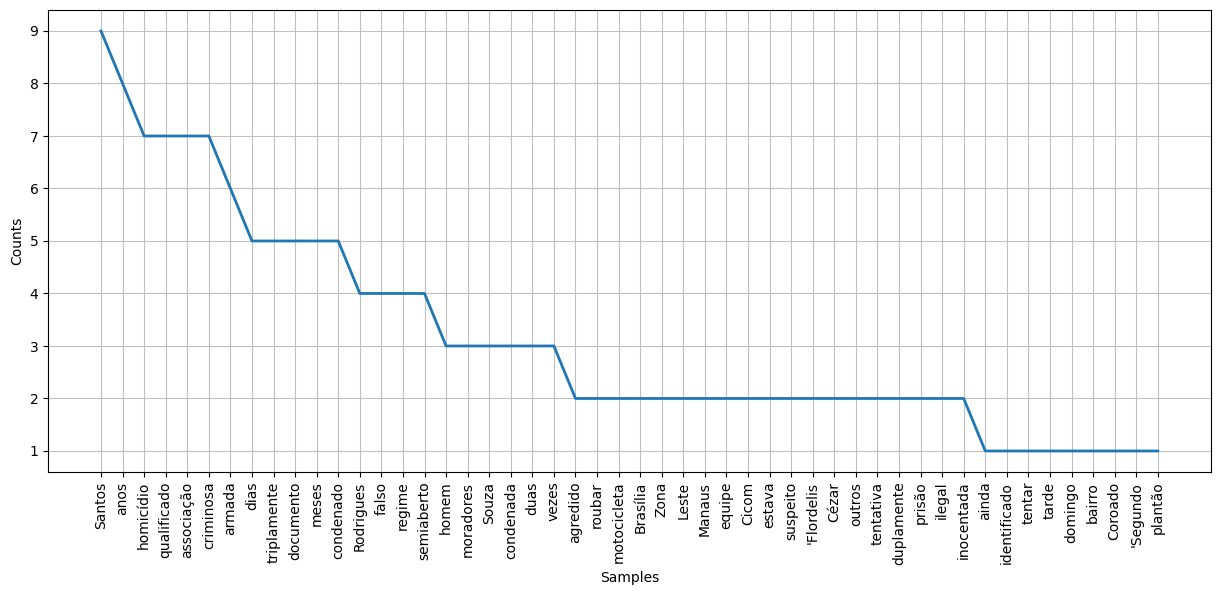

In [145]:
import matplotlib.pyplot as plt
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
plt.figure(figsize=(15,6))
frequency_dist.plot(50,cumulative=False)
plt.show()

#### Etapa 9-6. Construir uma nuvem de palavras
Uma nuvem de palavras é uma representação pictórica das palavras repetidas com mais frequência.

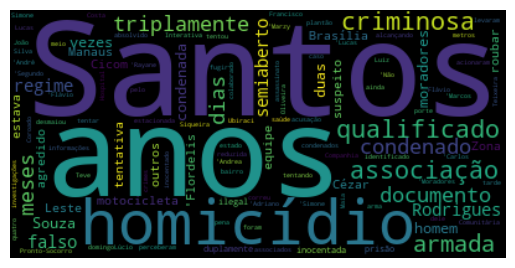

In [146]:
# construir uma wordcloud
from wordcloud import WordCloud
wcloud = WordCloud()
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

# Plotando o wordcloud
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

## Receita 2-10. Lidando com Emojis e Emoticons
O que é um emoji? A palavra *emoji* significa essencialmente “caractere de imagem” (do japonês *e* que significa “imagem: e *moji* que significa “caractere de letra”). O que é um emoticon? :): -] Um emoticon representa uma expressão facial humana que usa apenas caracteres do teclado, como letras, números e sinais de pontuação.

No mundo online de hoje, emojis e emoticons são o idioma principal que nos permite comunicar com qualquer pessoa globalmente quando precisamos ser rápidos e precisos. Ambos emoji e emoticons desempenham um papel essencial na análise de texto. Eles são usados com mais frequência em mídias sociais, e-mails e mensagens de texto, embora possam ser encontrados em qualquer tipo de comunicação eletrônica. Nos casos em que as emoções não são úteis, pode ser necessário removê-las de sua análise textual. Por outro lado, você deve retê-los porque eles fornecem informações valiosas, especialmente na análise de sentimentos, e removê-los pode não ser uma solução adequada; por exemplo, se uma empresa quer saber como as pessoas se sentem em relação a um novo produto, uma nova campanha ou a marca nas mídias sociais.

Os emojis ajudam a identificar onde o engajamento do consumidor precisa ser melhorado, imaginando o humor, as atitudes e as opiniões dos usuários. Isso fornece informações essenciais e é vital para qualquer empresa entender melhor os sentimentos de seus clientes. A coleta e análise de dados sobre emojis e emoticons fornecem informações úteis às empresas. Eles podem ser convertidos em um formato de palavra para serem usados em processos de modelagem. Neste livro, você verá como salvar emojis e emoticons em forma de palavra usando Python. Este livro usa uma biblioteca chamada **emot**.

### Problema
Você deseja substituir um emoji por uma palavra relevante e significativa.

### Solução
A maneira mais simples é usar a biblioteca emot.
### Como funciona
Siga estas próximas etapas.
#### Etapa 10-A1. Leia os dados de texto

In [147]:
# criar dados de texto de exemplo com emoji
text1 = "What are you saying 😂. I am the boss😎, and why are you so 😒"

#### Etapa 10-A2. Instale e importe as bibliotecas necessárias


In [154]:
#Instalando a biblioteca emot
import re
from emot.emo_unicode import UNICODE_EMOJI

#### Etapa 10-A3. Escreva uma função que transforme emojis em palavras

In [155]:
# Função para converter emojis em palavras
def converting_emojis(text):
      for emot in UNICODE_EMOJI:
            text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].
                                               replace(",","").replace(":","").split()))
      return text

#### Etapa 10-A4. Passe o texto com um emoji para a função

In [156]:
converting_emojis(text1)

'What are you saying face_with_tears_of_joy. I am the bosssmiling_face_with_sunglasses, and why are you so unamused_face'

### Problema
Você deseja remover emoji
### Solução
A maneira mais simples é usar Unicode.
### Como funciona
Siga estes próximos passos.
#### Etapa 10-B1. Leia os dados de texto

In [157]:
#create sample text data with emoji
text1 = "What are you saying 😂. I am the boss😎, and why are you so 😒"

#### Etapa 10-B2. Instale e importe as bibliotecas necessárias

In [158]:
import re
from emot.emo_unicode import UNICODE_EMOJI

#### Step 10-B3. Write a function to remove emojis

In [282]:
def emoji_removal(string):
      emoji_unicodes = re.compile("["
                                  u"\U0001F600-\U0001F64F" # emoticons
                                  u"\U0001F300-\U0001F5FF" # symbols
                                  u"\U0001F680-\U0001F6FF" # transport
                                  u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                                  u"\U00002500-\U00002BEF"
                                  u"\U00002702-\U000027B0"
                                  u"\U000024C2-\U0001F251"
                                  u"\U0001f926-\U0001f937"
                                  u"\U00010000-\U0010ffff"
                                  u"\u2640-\u2642"
                                  u"\u2600-\u2B55"
                                  u"\u200d"
                                  u"\u23cf"
                                  u"\u23e9"
                                  u"\u231a"
                                  u"\ufe0f"
                                  u"\u3030"
                                  "]+", flags=re.UNICODE)
      return emoji_unicodes.sub(r'', string)

#### Etapa 10-B4. Passe o texto com um emoji para a função

In [283]:
emoji_removal(text1)

'What are you saying . I am the boss, and why are you so '

### Problema
Encontre bibliotecas que detectam emojis e determinam seu significado.
### Solução
Você pode usar a biblioteca demoji.
### Como funciona
Siga estes próximos passos.
#### Etapa 10-E1. Leia os dados de texto

In [284]:
#create sample text data with emoji
text3 = """\
#Hey, I am going to say something special 🎅� that you are on 🔥 🐂
what is wrong with 🌋🌋 and it is so 👹 there are many... 🤡 🚣🏼 👨🏽‍⚖️
again with the same issue ... 🔥🔥
🇲🇽 and 🇳🇮 to find the best one of all 🔥🔥!!!!!.."""

#### Etapa 10-E2. Instale e importe as bibliotecas necessárias

In [288]:
import demoji

#### Etapa 10-E3. Encontre todos os emojis e determine seu significado

In [289]:
demoji.findall(text3)

{'🇲🇽': 'flag: Mexico',
 '🎅': 'Santa Claus',
 '🇳🇮': 'flag: Nicaragua',
 '🌋': 'volcano',
 '🔥': 'fire',
 '🐂': 'ox',
 '🤡': 'clown face',
 '🚣🏼': 'person rowing boat: medium-light skin tone',
 '👨🏽\u200d⚖️': 'man judge: medium skin tone',
 '👹': 'ogre'}

## Receita 2-11. Construindo um pipeline de pré-processamento de texto
Até agora, você concluiu a maioria das técnicas e métodos de manipulação e processamento de texto. Vamos fazer algo interessante nesta receita.
### Problema
Você deseja construir um pipeline de pré-processamento de texto de ponta a ponta. Sempre que você quiser fazer o pré-processamento de qualquer aplicativo NLP, você pode conectar dados diretamente a essa função de pipeline e obter os dados de texto limpo necessários como saída.
### Solução
A maneira mais simples é criar uma função personalizada usando todas as técnicas que você aprendeu até agora.
### Como funciona
Ele funciona colocando todas as técnicas de processamento possíveis em uma função wrapper e passando os dados por ela.
#### Etapa 11-1. Ler/criar os dados de texto
Vamos criar uma lista de strings e atribuí-la a uma variável—talvez um tweet de amostra.

In [292]:
tweet_sample= "How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.#Best advice for #family#financial #success (@PrepareToWin)"

Você também pode usar seus dados do Twitter extraídos no Capítulo 1.

#### Etapa 11-2. Processe o texto
Execute a seguinte função para processar o tweet.

In [293]:
def processRow(row):

    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize

    tweet = row
    #Lower case
    tweet.lower()
    #Removes unicode strings like "\u002c" and "x96"
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', tweet)
    tweet = re.sub(r'[^\x00-\x7f]',r'',tweet)
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #Removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
    #remove numbers
    tweet = ''.join([i for i in tweet if not i.isdigit()])
    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)
    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)
    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)
    #lemma
    from textblob import Word
    tweet =" ".join([Word(word).lemmatize() for word in tweet.split()])
    #stemmer
    #st = PorterStemmer()
    #tweet=" ".join([st.stem(word) for word in tweet.split()])
    #Removes emoticons from text
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', tweet)
    #trim
    tweet = tweet.strip('\'"')

    row = tweet

    return row

#call the function with your data
processRow(tweet_sample)

'How to take control of your debt URL advice for family financial success AT_USER'

Até agora, você aprendeu a ler dados de texto e depois processá-los e limpá-los. O próximo capítulo analisa a conversão de texto em recursos significativos que constroem aplicativos de NLP.